In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [11]:
test_labels.shape

(10000,)

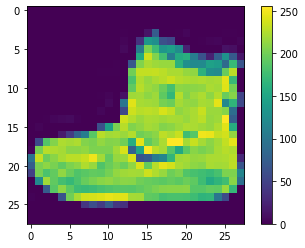

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
train_images = train_images / 255.0
test_images = test_images / 255.0

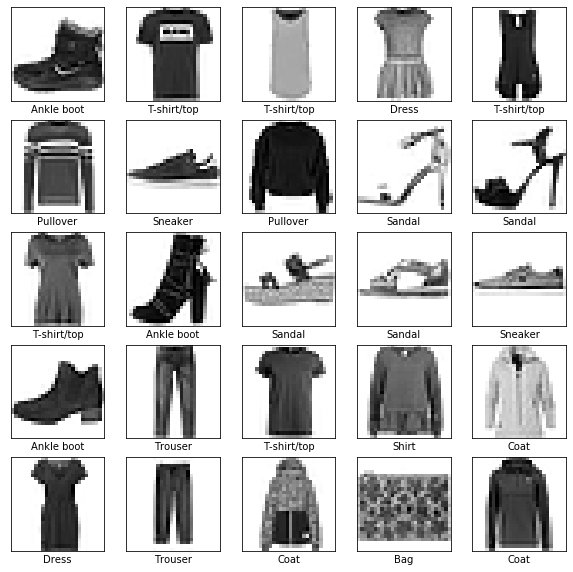

In [36]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.4986 - acc: 0.8253
Epoch 2/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3740 - acc: 0.8646
Epoch 3/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3356 - acc: 0.8775
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3113 - acc: 0.8849
Epoch 5/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2949 - acc: 0.8909


In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Accuracy: ',test_acc)

10000/10000 - 1s - loss: 0.3459 - acc: 0.8752
Accuracy:  0.8752


In [42]:
predictions = model.predict(test_images)

In [43]:
predictions[0]

array([2.7266401e-06, 2.0562089e-07, 2.9852599e-05, 1.9985944e-06,
       2.9485127e-06, 1.3265817e-02, 6.6650568e-06, 1.3285635e-01,
       4.6095018e-05, 8.5378742e-01], dtype=float32)

In [44]:
np.argmax(predictions[0])

9

In [45]:
test_labels[0]

9

In [80]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)    
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

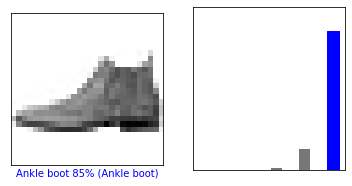

In [62]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

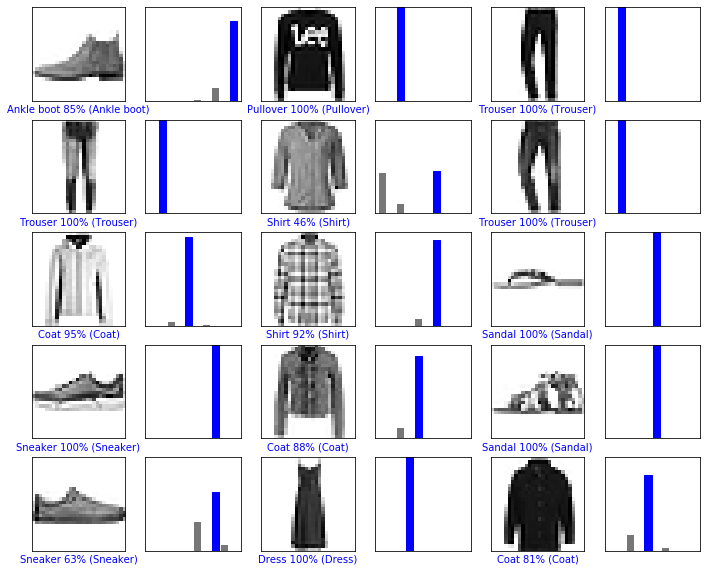

In [63]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [64]:
image = test_images[0]

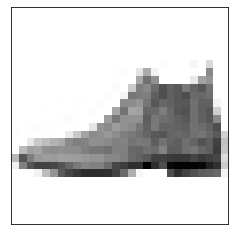

In [68]:
plt.figure()
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [69]:
image.shape

(28, 28)

In [70]:
image = (np.expand_dims(image,0))

image.shape

(1, 28, 28)

In [71]:
predictions_single = model.predict(image)

predictions_single

array([[2.7266401e-06, 2.0562011e-07, 2.9852656e-05, 1.9985923e-06,
        2.9485102e-06, 1.3265817e-02, 6.6650696e-06, 1.3285626e-01,
        4.6095018e-05, 8.5378742e-01]], dtype=float32)

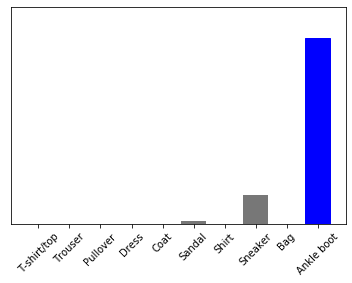

In [81]:
plot_value_array(0, predictions_single, test_labels)
p = plt.xticks(range(10), class_names, rotation=45)

In [82]:
np.argmax(predictions_single[0])

9

In [85]:
predictions_single

array([[2.7266401e-06, 2.0562011e-07, 2.9852656e-05, 1.9985923e-06,
        2.9485102e-06, 1.3265817e-02, 6.6650696e-06, 1.3285626e-01,
        4.6095018e-05, 8.5378742e-01]], dtype=float32)